In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
import random

# Tạo dữ liệu ngẫu nhiên
data = {
    'Feature1': [random.choice(['A', 'B']) for _ in range(100)],
    'Feature2': [random.choice(['X', 'Y', 'Z']) for _ in range(100)],
    'Feature3': [random.choice(['One', 'Two', 'Three', 'Four']) for _ in range(100)],
    'Feature4': [random.choice(['Red', 'Green', 'Blue', 'Yellow' ]) for _ in range(100)],
    'Feature5': [random.uniform(0.0, 10.0) for _ in range(100)],
    'Label': [random.choice([0, 1]) for _ in range(100)]
}

df = pd.DataFrame(data)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df.drop('Label', axis=1)
y = df['Label']
X_train=X
y_train=y
data_test = {
    'Feature1': [random.choice(['A', 'B']) for _ in range(100)],
    'Feature2': [random.choice(['X', 'Y', 'Z']) for _ in range(100)],
    'Feature3': [random.choice(['One', 'Two', 'Three', 'Four']) for _ in range(100)],
    'Feature4': [random.choice(['Red', 'Green', 'Blue', 'Yellow' ]) for _ in range(100)],
    'Feature5': [random.uniform(0.0, 10.0) for _ in range(100)],
    'Label': [random.choice([0, 1]) for _ in range(100)]
}
df_test = pd.DataFrame(data_test)
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_test = df_test.drop('Label', axis=1)
y_test = df_test['Label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le

scaler = StandardScaler()
numerical_features = X_train.select_dtypes(exclude=['object']).columns
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Sử dụng một mô hình học máy, ví dụ Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Đo lường hiệu suất của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Trực quan hóa cây quyết định
tree_rules = export_text(clf, feature_names=list(X.columns))

Accuracy: 0.53


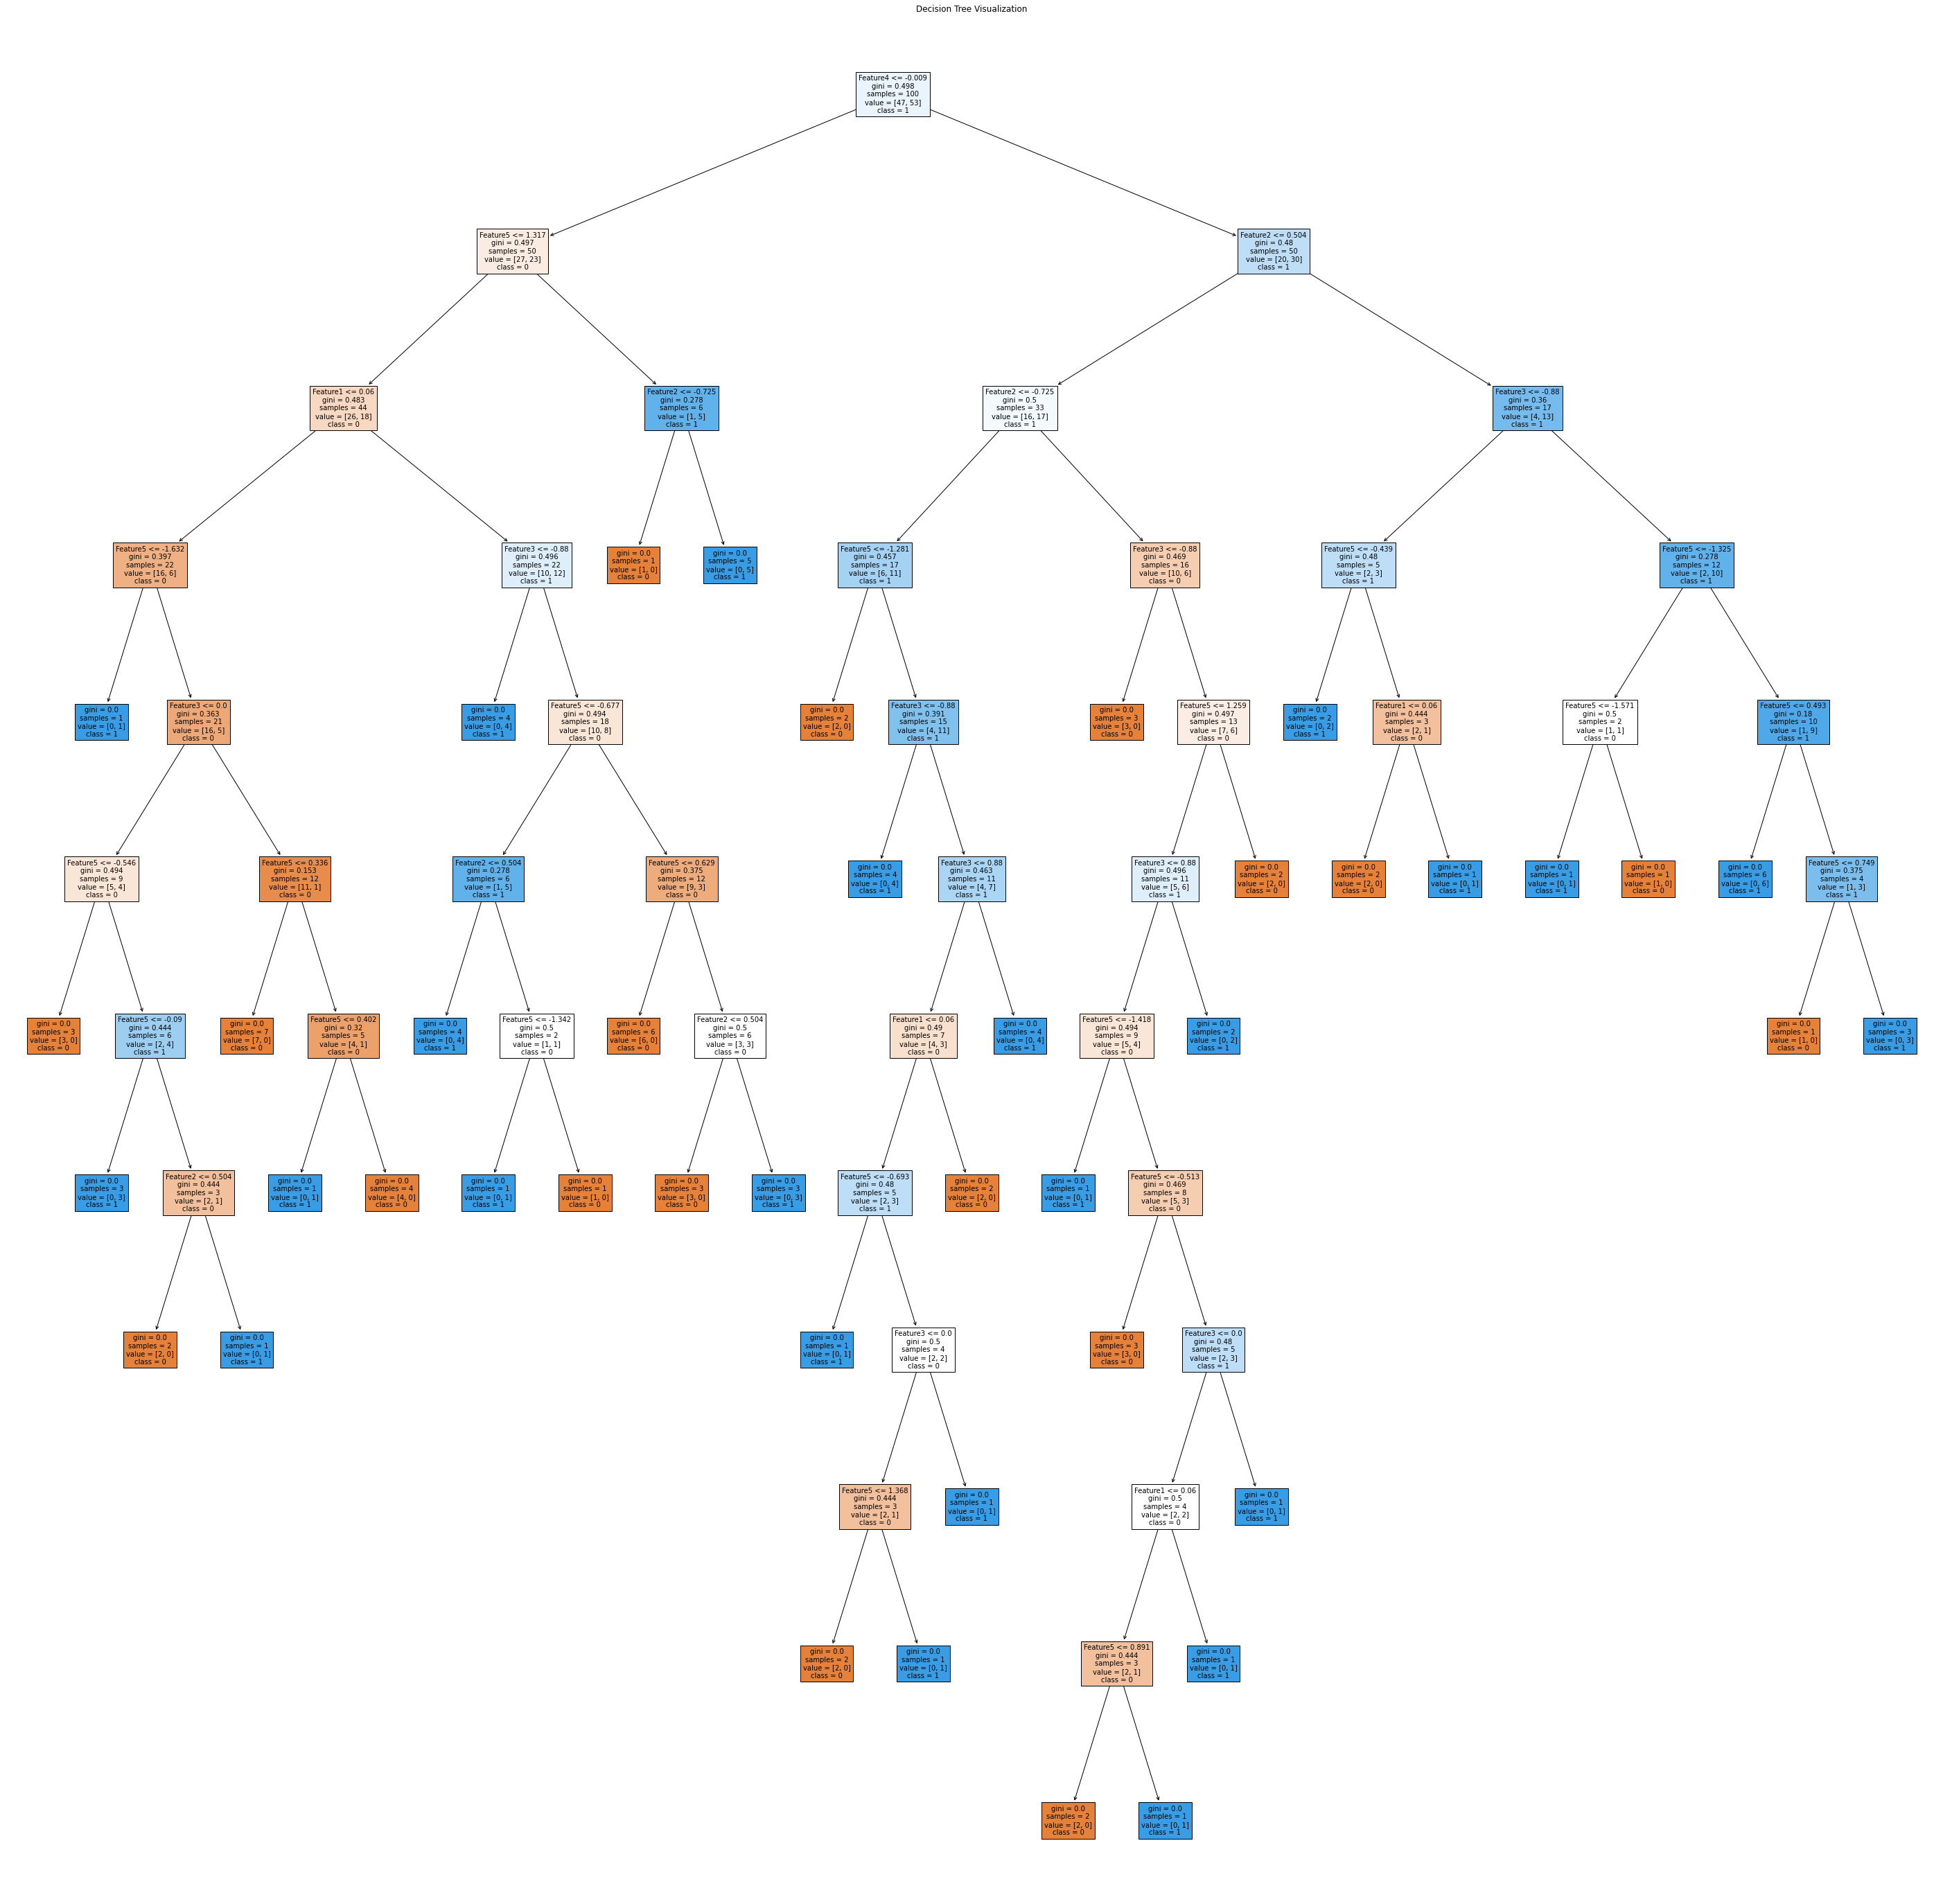

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(50, 50))
plot_tree(clf, feature_names=X_train.columns, class_names=[str(x) for x in clf.classes_], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


In [5]:
import numpy as np

# Extract feature importances from the Decision Tree model
feature_importances = clf.feature_importances_

# Combine feature names and importances into a list of tuples
feature_importance_tuples = list(zip(X_train.columns, feature_importances))

# Sort the list by feature importance in descending order
feature_importance_tuples.sort(key=lambda x: x[1], reverse=True)

# Display the top 5 most important rules
top_5_rules = feature_importance_tuples[:5]
for idx, (feature, importance) in enumerate(top_5_rules, start=1):
    print(f"Rule {idx}: {feature} (Importance: {importance:.4f})")

Rule 1: Feature5 (Importance: 0.5137)
Rule 2: Feature3 (Importance: 0.1867)
Rule 3: Feature2 (Importance: 0.1864)
Rule 4: Feature1 (Importance: 0.0936)
Rule 5: Feature4 (Importance: 0.0197)
